# TP 3.1 : Test de Student

Nous nous intéressons ici au test de Student de comparaison des moyennes sur 2 échantillons indépendants simulés selon des lois normales de même variance $\sigma^2 > 0$,
\begin{equation*}
X_1,\dots,X_p \sim \mathcal{N}(m_X,\sigma^2) \quad \text{et} \quad Y_1,\dots,Y_q \sim \mathcal{N}(m_Y,\sigma^2).
\end{equation*}
Pour expérimenter, nous prendrons $p=q=10$, $m_X=m_Y=0$ et $\sigma^2=1$.

In [24]:
# Génération des échantillons
x <- rnorm(10)
y <- rnorm(10)

Le test bilatéral de comparaison des moyennes sur ces 2 échantillons se fait en utilisant la fonction `t.test()` avec l'option `var.equal=TRUE`.

In [25]:
# Test bilatéral de comparaison des moyennes
resultat_test <- t.test(x, y, var.equal=TRUE)

# L'objet obtenu contient beaucoup d'informations
resultat_test


	Two Sample t-test

data:  x and y
t = -0.72124, df = 18, p-value = 0.48
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.8852488  0.4327753
sample estimates:
 mean of x  mean of y 
0.05177846 0.27801521 


Utilisez la cellule suivante pour répondre aux questions :
1. Donner l'hypothèse nulle $H_0$ et l'hypothèse alternative $H_1$ de ce test.
2. Pourquoi faut-il supposer que les deux échantillons aient la même variance ?
   En particulier, quelle est la loi de la variable
   $$
   (p+q-2)\frac{\tilde{\sigma}^2_{p,q}}{\sigma^2} \quad \text{où} \quad
   \tilde{\sigma}^2_{p,q} = \frac{1}{p+q-2}\sum_{k=1}^p\left( X_k - \bar{X}_p \right)^2 + \frac{1}{p+q-2}\sum_{k=1}^q\left( Y_k - \bar{Y}_q \right)^2
   $$
3. En déduire la loi de la statistique de test
   $$
   T = \sqrt{\frac{pq}{p+q}} \times \frac{\bar{X}_p - \bar{Y}_q}{\sqrt{\tilde{\sigma}^2_{p,q}}}.
   $$
4. Vérifier le calcul de la statistique de test donné dans `resultat_test`.
5. Quelle est la p-valeur du test `resultat_test` ?
   Pour un niveau de 95%, doit-on accepter ou rejeter $H_0$ ?
   Est-ce cohérent avec notre simulation initiale ?
6. Recalculer cette p-valeur à partir d'une loi de Student à 18 degrés de liberté.

In [ ]:
# À FAIRE

#1. 
#H0 les deux échantillons ont la même moyenne 
#H1 : les deux échantillons n'ont pas la même moyenne

#2 #3 voir onenote

#4 

sigma_pool_2 <- 1/ (10 + 10 - 2) * ( sum((x - mean(x))^2) + sum((y - mean(y))^2 ))
sigma_pool_2

T <- sqrt(length(x)*length(y)/(length(x)+length(y))) * ( mean(x) - mean(y) ) / sqrt(sigma_pool_2)
T

#5 
#on ne rejete pas H0 -> cohérent

[1] 0.4919679

[1] -0.7212399

In [34]:
#6
# statistique de test numérique
T_observe <- resultat_test$statistic

# degrés de liberté
df <- 18

# p-valeur bilatérale
p_valeur <- 2 * (1 - pt(abs(T_observe), df))

# affichage
cat("La p-valeur du test est :", p_valeur, "\n")

alpha <- 0.05
if(p_valeur < alpha){
  cat("p-valeur < 0.05 → on rejette H0\n")
} else {
  cat("p-valeur >= 0.05 → on ne rejette pas H0\n")
}



La p-valeur du test est : 0.4800259 
p-valeur >= 0.05 → on ne rejette pas H0


Pour illustrer la notion de niveau d'un test, nous simulons 1000 paires d'échantillons de taille 10 comme ci-dessus et nous les stockons dans deux matrices `X` et `Y`.

In [46]:
X <- matrix(rnorm(1000*10), nrow=1000)
Y <- matrix(rnorm(1000*10), nrow=1000)




<div class="alert alert-block alert-success">
    Utilisez la cellule suivante pour répondre aux questions :
    <ol>
        <li>Effectuer un test de comparaison des moyennes pour chaque paire d'échantillons et stocker la p-valeur du résultat dans un vecteur <code>p_valeur</code> de taille 1000.</li>
        <li>Combien de p-valeurs inférieures à 0.05 obtenez-vous ? Combien devriez-vous théoriquement en obtenir en moyenne ?</li>
        <li>Repérer l'indice du test qui donne la plus petite p-valeur (il peut être utile d'utiliser la fonction <code>which.min()</code>). Pour un niveau de 95%, doit-on accepter ou rejeter $H_0$ pour ce test ?</li>
        <li>Représenter graphiquement les données correspondant à ce test :
            <ul>
                <li>afficher la densité de la loi normale centrée réduite entre -3 et 3 avec <code>plot(dnorm, -3, 3, type="l")</code>,</li>
                <li>afficher les deux échantillons avec deux couleurs différentes grâce à la fonction <code>rug()</code>,</li>
                <li>afficher les moyennes des deux échantillons (fonction <code>rug()</code>),</li>
                <li>ajouter une légende.</li>
            </ul>
            <center><img src="img/student.png"></center>
        </li>
    </ol>
</div>

In [47]:
# À FAIRE

#1 
p_valeur <- rep(NA, 1000)

df = 18

for (i in seq(from=1, to=1000)){
    resultat_test <- t.test(X[i,],Y[i,], var.equal = TRUE)
    p_valeur[i] <- 2 * (1 - pt(abs(resultat_test$statistic), df))
}
    

#2 
c <- 0
for (p in p_valeur){
    if (p<0.05){
        c <- c + 1
    }
}

c

# Théoriquement, sous H0, on s'attend à alpha*n rejets
alpha <- 0.05
theorique <- alpha * 1000
cat("Nombre théorique de p-valeurs < 0.05 :", theorique, "\n")

[1] 38

Nombre théorique de p-valeurs < 0.05 : 50 


In [48]:
#3

indice_min <- which.min(p_valeur)
min(p_valeur)
cat("Indice du test avec la plus petite p-valeur :", indice_min, "\n")

[1] 0.001866087

Indice du test avec la plus petite p-valeur : 430 


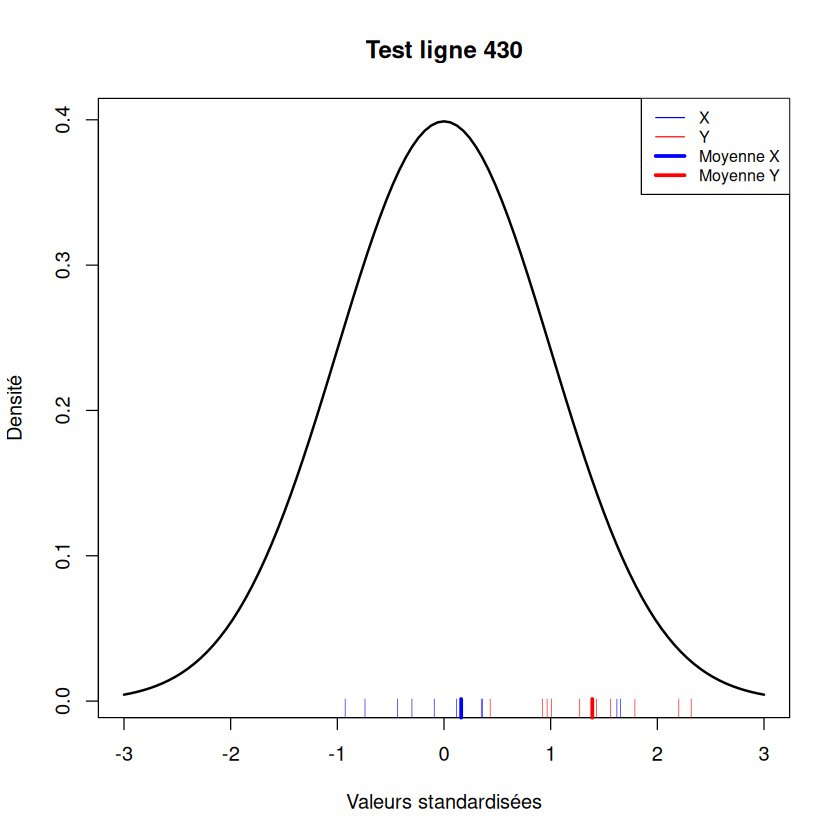

In [52]:
#4
par (bg = "white")
# Tracer la densité de la loi normale centrée réduite
plot(dnorm, -3, 3, type="l", lwd=2, col="black",
     main=paste("Test ligne", indice_min),
     ylab="Densité", xlab="Valeurs standardisées")

# Ajouter les échantillons X et Y avec rug
rug(X[indice_min,], col="blue")  # échantillon X
rug(Y[indice_min,], col="red")   # échantillon Y

# Ajouter les moyennes
rug(mean(X[indice_min,],), col="blue", lwd=3)
rug(mean(Y[indice_min,],), col="red", lwd=3)

# Ajouter une légende
legend("topright", legend=c("X", "Y", "Moyenne X", "Moyenne Y"),
       col=c("blue","red","blue","red"), lwd=c(1,1,3,3), cex=0.8)
